## Import needed libraries and pakages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score

from sklearn.decomposition import PCA

## Read data and explore it

In [2]:
data = pd.read_csv("data/mpg.csv")
print(f"Shape of the data: {data.shape}\n")
print(data.info())
data.head()

Shape of the data: (398, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Notes: 
- there is no missing values 
- the `horsepower` column's data type is `object` and it should be numerical and the `origin` should be categorical value
- we have one categorical value which is the `car name`, we will check its unique values and see if we could apply encoding

## Data Preprocessing

### Convert data type of the `horsepower` column to numerical value and `origin` to categorical

In [3]:
data["horsepower"] = pd.to_numeric(data["horsepower"], errors="coerce")
data["origin"] = data["origin"].astype("object")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### Note: we have missing values in `horsepower` column now, we have to deal with

In [4]:
data[pd.isnull(data).any(axis=1) == True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [5]:
data["horsepower"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

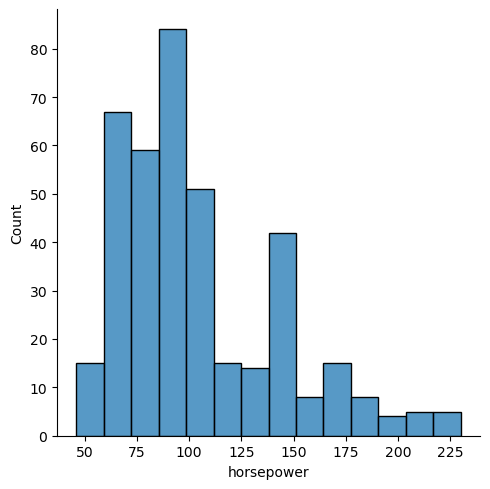

In [6]:
sns.displot(data, x="horsepower")

In [7]:
data["horsepower"].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [8]:
# filling the null values with the median value 
data["horsepower"].fillna(data["horsepower"].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Dealing with the categorical values

In [10]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
print("Unique values of the categorical variables: ")

for col in cat_cols:
    print(col, data[col].nunique())

Unique values of the categorical variables: 
origin 3
name 305


#### encoding the `object` column using one hot encoding and dropping the `car name` column 

In [11]:
transformer = make_column_transformer((OneHotEncoder(), ["origin"]), remainder="passthrough")

transformed = transformer.fit_transform(data[["origin"]])
transformed_df = pd.DataFrame(transformed, index=data.index)
transformed_df.head()

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [12]:
data.drop(columns=["name", "origin"], axis=1, inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


### Normalization

In [13]:
scaled_cols = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]
scaler_transformer = make_column_transformer((StandardScaler(), scaled_cols), remainder="passthrough")

scaled = scaler_transformer.fit_transform(data[scaled_cols])
scaled_df = pd.DataFrame(scaled, index=data.index, columns=scaled_cols)
scaled_df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [14]:
X = pd.concat([scaled_df, transformed_df], axis=1)
y = data.iloc[:, 0]

In [15]:
X.columns = X.columns.astype(str)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,0,1,2
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1.0,0.0,0.0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1.0,0.0,0.0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1.0,0.0,0.0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1.0,0.0,0.0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1.0,0.0,0.0


In [16]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

### Linear Regression model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = reg.predict(X_test)
acc = r2_score(y_test, y_pred)
print('Accuracy: %.2f' % (acc*100))

Accuracy: 82.74


### Correlation

<AxesSubplot: >

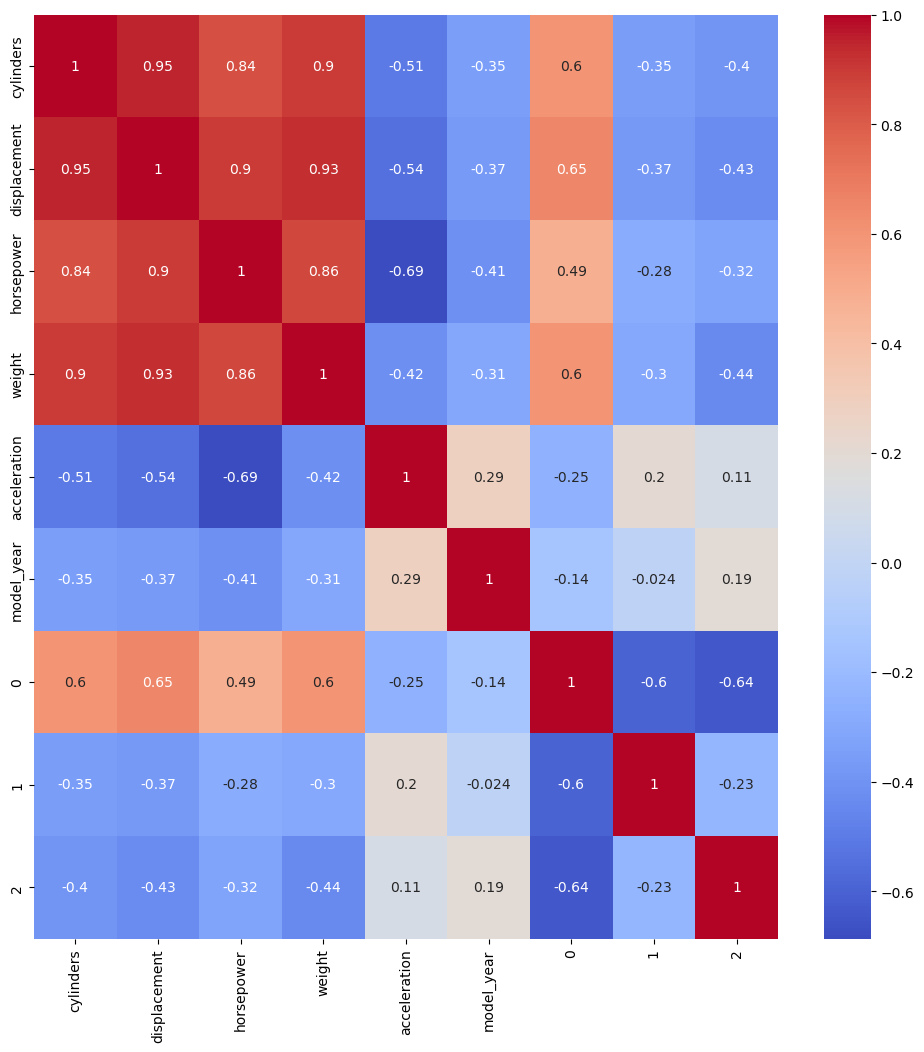

In [19]:
plt.figure(figsize = (12, 12))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', 
            xticklabels=X.columns,
            yticklabels=X.columns)

In [20]:
# we should drop the most correlated features
# drop `displacement`, `horsepower` and `weight`
X.drop(columns=['displacement', 'horsepower', 'weight'], axis=1, inplace=True)
X.head()

,cylinders,acceleration,model_year,0,1,2
0,1.498191,-1.295498,-1.627426,1.0,0.0,0.0
1,1.498191,-1.477038,-1.627426,1.0,0.0,0.0
2,1.498191,-1.658577,-1.627426,1.0,0.0,0.0
3,1.498191,-1.295498,-1.627426,1.0,0.0,0.0
4,1.498191,-1.840117,-1.627426,1.0,0.0,0.0


<AxesSubplot: >

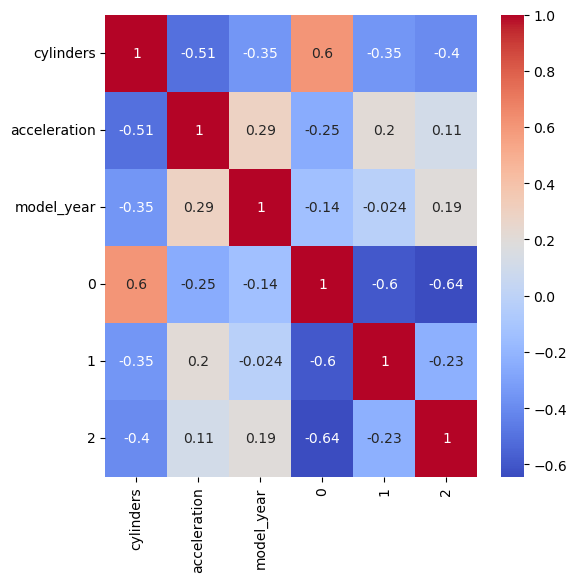

In [21]:
plt.figure(figsize = (6, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', 
            xticklabels=X.columns,
            yticklabels=X.columns)

In [22]:
# applying linear regression again 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
acc = r2_score(y_test, y_pred)
print('Accuracy: %.2f' % (acc*100))

Accuracy: 73.43


### PCA

In [23]:
pca = PCA(n_components=3)
X_p = pd.DataFrame(pca.fit_transform(X), columns=['PC0', 'PC1', 'PC3'])
X_p.head()

,PC0,PC1,PC3
0,2.559020,0.474630,-0.010944
1,2.662745,0.412303,-0.143910
2,2.766471,0.349975,-0.276875
3,2.559020,0.474630,-0.010944
4,2.870196,0.287648,-0.409840


In [24]:
# applying linear regression again 
X_train, X_test, y_train, y_test = train_test_split(X_p, y, test_size=0.2, random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
acc = r2_score(y_test, y_pred)
print('Accuracy: %.2f' % (acc*100))

Accuracy: 74.65
